# Matrice Fourier

In [ ]:
import numpy as np


def W(N):
    w = np.outer(np.arange(N), np.arange(N))  
    W_matrix = np.exp(-2j * np.pi * w / N)  
    return W_matrix


def format_W_matrix(W):
    def simplify(c):
        if abs(c.real) < 1e-10:
            if abs(c.imag - 1) < 1e-10:
                return " i"
            elif abs(c.imag + 1) < 1e-10:
                return "-i"
            elif abs(c.imag) < 1e-10:
                return 0
        elif abs(c.real - 1) < 1e-10:
            return " 1"
        elif abs(c.real + 1) < 1e-10:
            return "-1"
        return str(c)

    return [[simplify(W[n, m]) for m in range(W.shape[1])] for n in range(W.shape[0])]

def afficher_matrice(matrice):
    for ligne in matrice:
        print(" ".join(f"{val:2}" for val in ligne))

# Example usage
W_matrix = W(4)
afficher_matrice(format_W_matrix(W_matrix))


 1  1  1  1
 1 -i -1  i
 1 -1  1 -1
 1  i -1 -i


Generer signal

In [14]:
from math import sin, pi
def generate_signal(f, N):
    return [sin(2 * pi * f * k) for k in range(N)]


Multiplier puis calculer le temps d'execution

In [32]:
import timeit
import cmath

# OLD CODE - TP3

def generate_signal_old(f, N):
    return [sin(2 * pi * f * k) for k in range(N)]


def compute_f_matrix(N):
    return [[cmath.exp(-2j * pi * n * m / N) for m in range(N)] for n in range(N)]


def multiplication_vecteur(matrice, vecteur):
    return [
        sum(matrice[i][j] * vecteur[j] for j in range(len(vecteur)))
        for i in range(len(matrice))
    ]


def apply_fourier_transform(signal):
    N = len(signal)
    W = compute_f_matrix(N)
    return [abs(x) for x in multiplication_vecteur(W, signal)]


# NEW CODE - TP4 EX 2

def compute_dft(signal):
    N = len(signal)
    W_matrix = W(N)
    dft_result = np.dot(W_matrix, signal)  # multiplication
    return np.abs(dft_result)


N = 64  # size
frequencies = [0.13, 0.135]
for f in frequencies:
    signal = generate_signal(f, N)
    dft_result = compute_dft(signal)
    print(f"DFT resultat pour f={f}:\n\n {dft_result}\n")

# Time 
setup_code = """
import numpy as np
from math import sin, pi
from __main__ import generate_signal, compute_dft, W

N = 64
f = 0.13
signal = generate_signal(f, N)
dft_res = compute_dft(signal)
"""

setup_code_old = """
import numpy as np
from math import sin, pi
from __main__ import generate_signal_old, multiplication_vecteur, apply_fourier_transform, compute_f_matrix

N = 64
f = 0.13

signal = generate_signal_old(f,N)
test = apply_fourier_transform(signal)
"""
time_numpy = timeit.timeit(
    "compute_dft(signal)", 
    setup=setup_code, 
    number=1000
)
time_old = timeit.timeit(
    "apply_fourier_transform(signal)", 
    setup=setup_code_old, 
    number=1000
)
print(f"\nNumPy temp de calculs: {time_numpy:.5f} sec\n")
print(f"TP-3 temp de calculs: {time_old:.5f} sec")


DFT resultat pour f=0.13:

 [ 1.19497725  1.22883374  1.33548969  1.53317441  1.86494895  2.43355937
  3.52728289  6.3185852  26.66609134 12.86721227  5.34707308  3.44366296
  2.57747645  2.08338084  1.76479359  1.5429317   1.38009739  1.2559993
  1.15875486  1.0809502   1.01772567  0.96576848  0.92274787  0.8869818
  0.85723174  0.83257175  0.81230245  0.79589327  0.78294282  0.77315155
  0.76630284  0.76225008  0.76090842  0.76225008  0.76630284  0.77315155
  0.78294282  0.79589327  0.81230245  0.83257175  0.85723174  0.8869818
  0.92274787  0.96576848  1.01772567  1.0809502   1.15875486  1.2559993
  1.38009739  1.5429317   1.76479359  2.08338084  2.57747645  3.44366296
  5.34707308 12.86721227 26.66609134  6.3185852   3.52728289  2.43355937
  1.86494895  1.53317441  1.33548969  1.22883374]

DFT resultat pour f=0.135:

 [2.19850269e+00 2.22752741e+00 2.31952209e+00 2.49149664e+00
 2.78144245e+00 3.27419991e+00 4.18778431e+00 6.27702128e+00
 1.50234667e+01 2.50090329e+01 6.21134817e+0

In [ ]:
# Parametres
N_values = [64, 256, 1024]  # longeur different
frequencies = [0.13, 0.135]  # Frequences different


N = 64
print("Comparer DFT et FFT pour N=64:")
for f in frequencies:
    signal = generate_signal(f, N)
    dft_result = compute_dft(signal)
    fft_result = np.abs(np.fft.fft(signal))
    max_diff = np.max(np.abs(dft_result - fft_result))
    print(f"Freq f={f}: Difference maximale = {max_diff:.2e}")

# Comparer en temp pour diff longeurs
print("\nComparaison en temp:")
for N in N_values:
    setup_code = f"""
import numpy as np
from math import sin, pi
from __main__ import generate_signal, compute_dft

N = {N}
f = 0.13
signal = generate_signal(f, N)
"""
    number = 100 if N <= 256 else 10
    time_dft = timeit.timeit("compute_dft(signal)", setup=setup_code, number=number)
    time_fft = timeit.timeit(
        "np.abs(np.fft.fft(signal))", setup=setup_code, number=number
    )

    print(f"\nN = {N}:")
    print(f"  DFT ({number} appels): {time_dft:.5f} sec")
    print(f"  FFT ({number} appels): {time_fft:.5f} sec")
    print(f"  FFT est {time_dft / time_fft:.0f} fois plus rapide")


Comparer DFT et FFT pour N=64:
Freq f=0.13: Difference maximale = 1.67e-13
Freq f=0.135: Difference maximale = 1.81e-13

Comparaison en temp:

N = 64:
  DFT (100 appels): 0.02163 sec
  FFT (100 appels): 0.00111 sec
  FFT est 20 fois plus rapide

N = 256:
  DFT (100 appels): 0.13029 sec
  FFT (100 appels): 0.00138 sec
  FFT est 94 fois plus rapide

N = 1024:
  DFT (10 appels): 0.21859 sec
  FFT (10 appels): 0.00038 sec
  FFT est 570 fois plus rapide


EX4

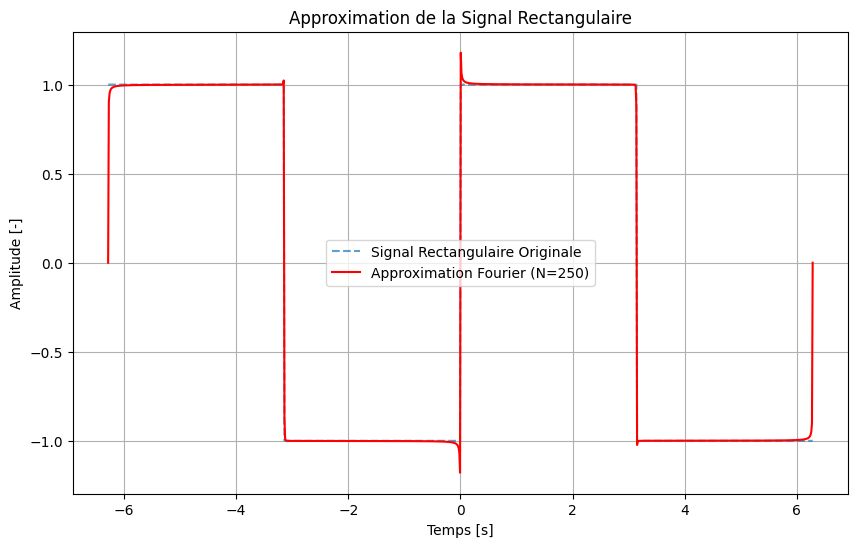

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N :int = int(input("Entrez n de coefficients: "))

T = 2 * np.pi

t = np.linspace(-T, T, 1000)

original_signal = np.sign(np.sin(t))  
approximation = np.zeros_like(t)

for k in range(1, N + 1):
    coefficient = 4 / (np.pi * (2 * k - 1))
    harmonic = np.sin((2 * k - 1) * t)
    approximation += coefficient * harmonic

plt.figure(figsize=(10, 6))
plt.plot(t, original_signal, label="Signal Rectangulaire Originale", linestyle="--", alpha=0.7)
plt.plot(t, approximation, label=f"Approximation Fourier (N={N})", color="red")
plt.title("Approximation de la Signal Rectangulaire")
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude [-]")
plt.grid(True)
plt.legend()
plt.show()
